In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits 
import pickle
%matplotlib widget

In [2]:
taste_bjd_tdb = pickle.load(open('./TASTE_analysis/taste_bjdtdb.p','rb'))
differential_allref = pickle.load(open('./TASTE_analysis/differential_allref.p','rb'))
differential_allref_error = pickle.load(open('./TASTE_analysis/differential_allref_error.p','rb'))

tess_sector44_dict = pickle.load(open('./TESS_analysis/WASP-12_TESS_sector044_filtered.p','rb'))
tess_bjd_tdb = tess_sector44_dict['time']
tess_normalized_flux = tess_sector44_dict['pdcsap_masked_hspline_w11_flux']
tess_normalized_ferr = tess_sector44_dict['pdcsap_masked_hspline_w11_flux_error']

Now we set the parameters for TASTE and TESS data; the polynomial trend is the fit that we used for normalizing the differential photometry in the TASTE dataset.

In [4]:
theta = np.empty(14)

theta[0] = 2458842.997159  #time of inferior conjunction
theta[1] = 1.0914304         #orbital period
theta[2] = 0.117         #planet radius (in units of stellar radii)
theta[3] = 3.          #semi-major axis (in units of stellar radii)
theta[4] = 83.52           #orbital inclination (in degrees)
theta[5] = 0.41           # TESS LD coeff u1
theta[6] = 0.13           # TESS LD coeff u2
theta[7] = 0.51           # TASTE LD coeff u1
theta[8] = 0.13           # TASTE LD coeff u2
theta[9] = 1.35773796           # zero-th order coefficient for the polynomial trend
theta[10] = -0.00283274           # first order coefficient for the polynomial trend
theta[11] = 0.0           # second order coefficient for the polynomial trend
theta[12] = 0.0           # jitter parameter for TESS data
theta[13] = 0.0           # jitter parameter for TASTE data

In [5]:
import batman

params = batman.TransitParams()
params.t0 =  theta[0]                
params.per = theta[1]                    
params.rp =  theta[2]                 
params.a =   theta[3]                   
params.inc =  theta[4]    
params.ecc = 0.
params.w = 90. 
params.u = [theta[5] , theta[6]]
params.limb_dark = "quadratic"

m_tess = batman.TransitModel(params, tess_bjd_tdb)    #initializes model
tess_flux =m_tess.light_curve(params)          #calculates light curv

params.u = [theta[7] , theta[8]]
median_bjd = np.median(taste_bjd_tdb)
polynomial_trend = theta[9] + theta[10]*(taste_bjd_tdb-median_bjd) + theta[11]*(taste_bjd_tdb-median_bjd)**2

m_taste = batman.TransitModel(params, taste_bjd_tdb)    #initializes model
taste_flux = m_taste.light_curve(params) * polynomial_trend

And now we plot the two datasets with the batman light curves. Remember: in this plot the TASTE dataset is NOT normalized since we previously multiplied for the polynomial trend.

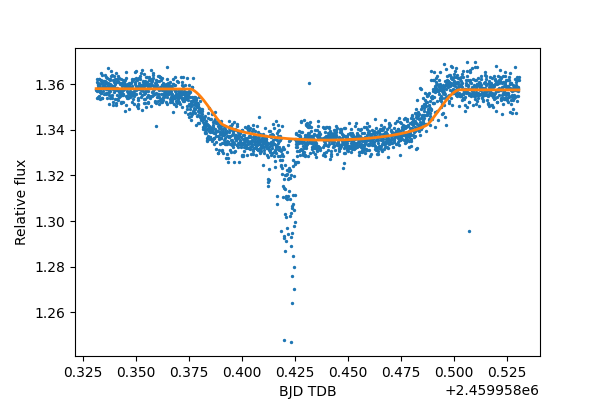

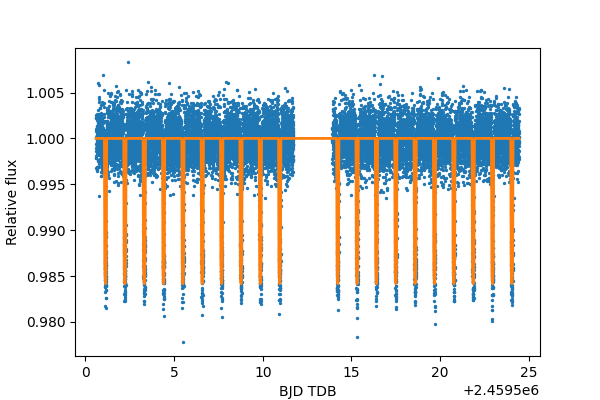

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(taste_bjd_tdb, differential_allref, s=2)
plt.plot(taste_bjd_tdb, taste_flux, lw=2, c='C1')
plt.xlabel("BJD TDB")
plt.ylabel("Relative flux")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(tess_bjd_tdb, tess_normalized_flux, s=2)
plt.plot(tess_bjd_tdb, tess_flux, lw=2, c='C1')
plt.xlabel("BJD TDB")
plt.ylabel("Relative flux")
plt.show()